In [2]:
import numpy as np
import random
from PIL import Image
import pandas as pd
from wordcloud import WordCloud

In [7]:
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    # path = "font/MaplestoryBold.ttf"
    path="font/MaplestoryBold.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다. 
plt.rcParams['axes.unicode_minus'] = False 

In [13]:
data=pd.read_excel('data/goodsdf.xlsx')

In [10]:
text=(",").join(data['sub1'])

In [18]:
a=data['sub1'].value_counts()

In [22]:
dict=a.to_dict()

In [23]:
dict

{'소스류': 204,
 '레토르트': 200,
 '스낵': 167,
 '과채음료': 158,
 '위생용품': 155,
 '비스킷': 154,
 '분말차': 124,
 '통조림': 110,
 '탄산음료': 89,
 '봉지면': 80,
 '캔디': 72,
 '장류': 65,
 '커피음료': 54,
 '용기면': 53,
 '두발용품': 53,
 '기능성음료': 53,
 '우유': 52,
 '기타': 52,
 '화장품': 48,
 '요구르트': 45,
 '차음료': 44,
 '분말조미료': 37,
 '분말조리식': 36,
 '가공분말류': 33,
 '파이류': 31,
 '주방세제': 30,
 '주방용품': 29,
 '액상조미료': 28,
 '생수': 27,
 '초콜렛': 27,
 '씨리얼': 25,
 '욕실주거세제': 25,
 '껌류': 25,
 '구강용품': 23,
 '레저취미': 22,
 '안주': 21,
 '견과류': 21,
 '탄산수': 21,
 '맥주': 20,
 '세탁세제': 18,
 '설탕류': 17,
 '식용유': 17,
 '섬유유연제': 13,
 '치즈': 11,
 '푸딩/젤리': 10,
 '전통주': 10,
 '소금류': 10,
 '병통조림': 9,
 '액상차': 9,
 '제습/탈취': 8,
 '공구/전기': 7,
 '유아용품': 6,
 '생리용품': 6,
 '버터': 5,
 '전통과자': 5,
 '가공안주류': 5,
 '목욕용품': 5,
 '사무용품': 5,
 '절임/잼': 4,
 '과일음료': 4,
 '세탁용품': 4,
 '기타주류': 3,
 '차류': 3,
 '냉장음료': 3,
 '의약외품': 3,
 '화장지': 2,
 '건해조류': 2,
 '건면': 2,
 '소주': 2,
 '건강보조식품': 2,
 '캔통조림': 2,
 '디저트/베이커리': 2,
 '두유': 1,
 '시리얼': 1,
 '설텅류': 1,
 '비스': 1,
 '유아식품': 1,
 '가공분만류': 1,
 '소시지': 1,
 '분말조미류': 1,
 '속옷': 1,
 '마른안주': 

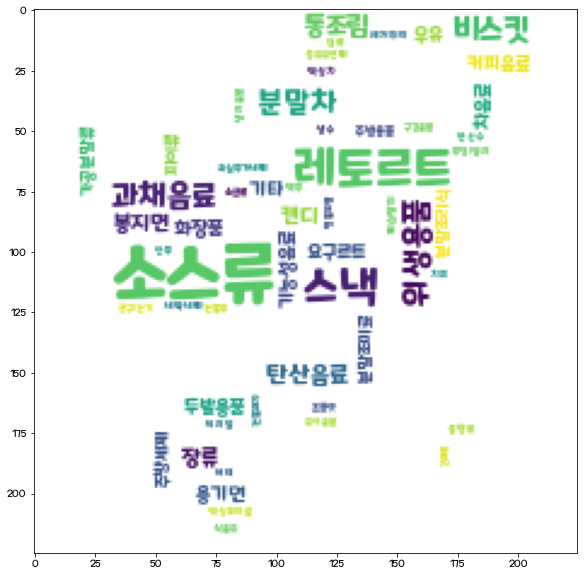

In [73]:
icon = Image.open('cart3.jpg').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)



wc = WordCloud(font_path=path, background_color="white", max_words=2000, mask=mask,
               max_font_size=3000,min_font_size=4, random_state=42).generate_from_frequencies(dict)
plt.figure(figsize=(10,10))
plt.imshow(wc)

cart_coloring = np.array(Image.open('cart3.jpg'))
# image_colors = ImageColorGenerator(cart_coloring)
# wc.recolor(color_func=image_colors)

plt.imshow(wc)
wc.to_file('cartcloud.png')
# generate word cloud
# wc.generate_from_text(message)
# wc.recolor(color_func=color_func, random_state=3)

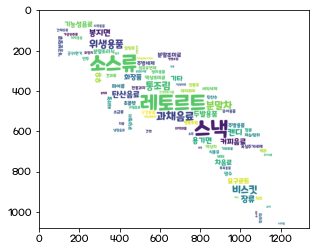

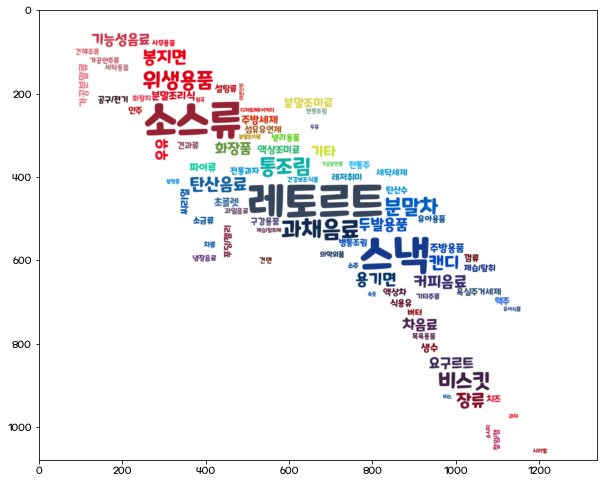

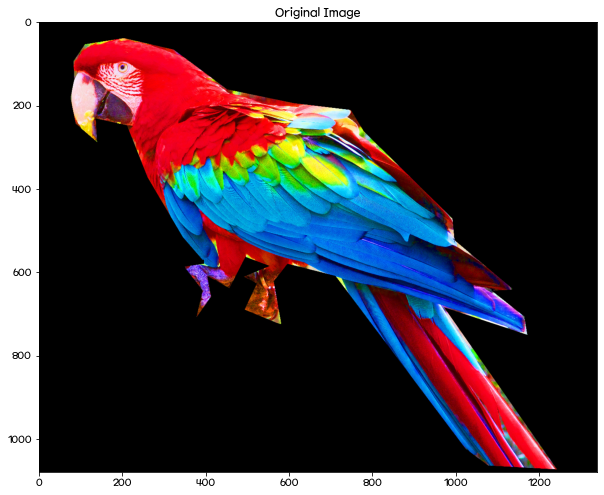

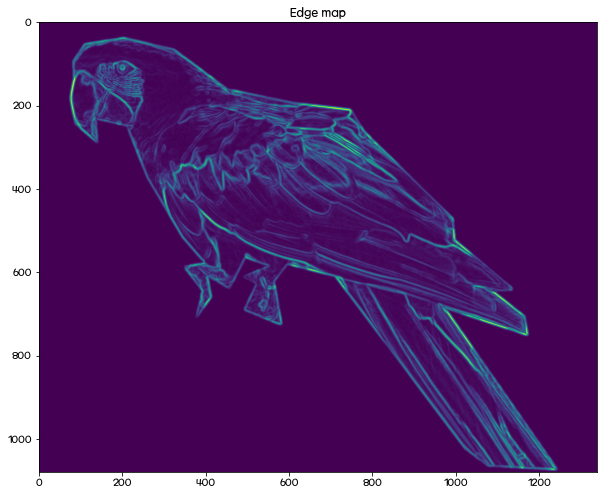

In [43]:
"""
Image-colored wordcloud with boundary map
=========================================
A slightly more elaborate version of an image-colored wordcloud
that also takes edges in the image into account.
Recreating an image similar to the parrot example.
"""
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator


# load image. This has been modified in gimp to be brighter and have more saturation.
# parrot_color = np.array(Image.open("parrot-by-jose-mari-gimenez2.jpg"))

parrot_color = np.array(Image.open("parrot-by-jose-mari-gimenez2.jpg"))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000,background_color='white', font_path=path,mask=parrot_mask, max_font_size=100, random_state=42, relative_scaling=0).generate_from_frequencies(dict)

# generate word cloud
# wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()